In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
file_name = 'data.txt'
all_info=[]
info={}
def distance_between_two_points(lat1,lon1, lat2,lon2):
    R = 6372800  # Earth radius in meters
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

In [20]:
with open(file_name) as f:
    lines = f.readlines()
    data_started=0
    for idx in range(len(lines)):
        if("====" in lines[idx]):
            if(idx>0):
                all_info.append(info)
                #print(info)
            info={}
            data_started = 1
            name = lines[idx].replace("=","")[:-10]
            info["name"] = name
            info["time"] = -1
            info["location"]=-1
            info["pulse"] = -1
            info["humidity"]=-1
            info["temp"] = -1
            
        if('Timestamp' in lines[idx]):
            info["time"] = float(lines[idx][11:][:-2])
        if('location' in lines[idx]):
            if("NaN" not in lines[idx]):                
                loc_data = lines[idx][15:][:-2]
                loc_data = loc_data.split(",")
                loc_data[0]=float(loc_data[0])
                loc_data[1]=float(loc_data[1])
                info["location"] =loc_data
        if('pulseOxygen' in lines[idx]):
            if("NaN" not in lines[idx]):                
                loc_data = lines[idx][18:][:-2]
                loc_data = loc_data.split(",")
                loc_data[0]=float(loc_data[0])
                loc_data[1]=float(loc_data[1])
                loc_data[2]=float(loc_data[2])
                loc_data[3]=float(loc_data[3])
                info["pulse"] =loc_data
        if('temperature' in lines[idx]):
            if("NaN" not in lines[idx]):                                
                loc_data = lines[idx][17:][:-1]
                loc_data=float(loc_data)
                info["temp"] =loc_data
        if('humidity' in lines[idx]):
            if("NaN" not in lines[idx]):                                
                loc_data = lines[idx][14:][:-1]
                loc_data=float(loc_data)
                info["humidity"] =loc_data

speed={}
location_time_data={}
for data in all_info:
    if("Zebra" in data["name"]):
        data_new = {"loc":data["location"],"time":data["time"]}
        if(data["name"] in location_time_data):
            location_time_data[data["name"]].append(data_new)
        else:
            location_time_data[data["name"]]=[data_new]
speed={}
all_speeds=[]
plt.show()

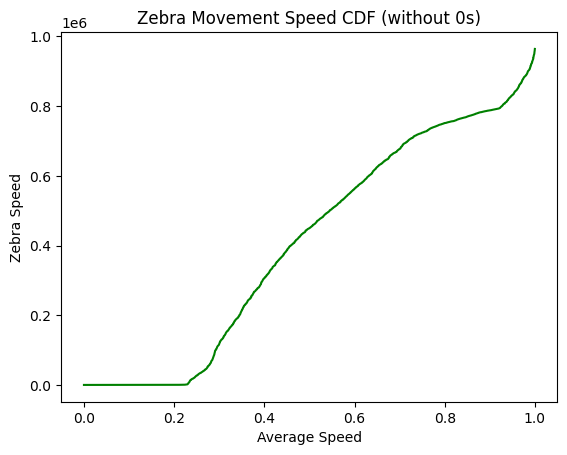

In [21]:
# Without 0s
for k, v in location_time_data.items():
    speed[k] = []
    last_loc = None
    last_time = None
    for idx in range(len(v)):
        cur_loc = v[idx]['loc']
        cur_time = v[idx]['time']
        if cur_loc == -1:
            last_loc = None
            last_time = None
            continue
        if last_loc is not None:
            dist = haversine(last_loc[0], last_loc[1], cur_loc[0], cur_loc[1])
            spe = dist / (cur_time - last_time) * 1.0
            speed[k].append(spe)
            all_speeds.append(spe)
        last_loc = cur_loc
        last_time = cur_time

all_speeds = [s for s in all_speeds if s != 0]  # Remove 0s from all_speeds
all_speeds.sort()

N = len(all_speeds)
y = np.arange(N) / float(N)
plt.title("Zebra Movement Speed CDF (without 0s)")
plt.ylabel("Zebra Speed")
plt.xlabel("Average Speed")
plt.plot(y, all_speeds, color = 'green')
plt.show()

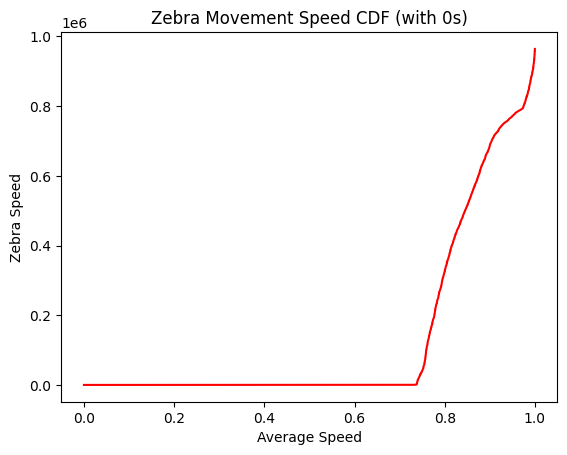

In [22]:
# With 0s
for k,v in location_time_data.items():
    speed[k]=[]
    last_loc = [-1,-1]
    last_time = -1
    for idx in range(len(v)):
        if(v[idx]['loc'] == -1):
            continue
        cur_loc = v[idx]['loc']
        cur_time = v[idx]['time']
        if(last_loc != [-1,-1]):
            dist = haversine(last_loc[0],last_loc[1],cur_loc[0], cur_loc[1])
            spe = dist/(cur_time-last_time)*1.0
            speed[k].append(spe)
            all_speeds.append(spe)
        last_loc = cur_loc
        last_time = cur_time
all_speeds.sort()
N = len(all_speeds)   
y = np.arange(N) / float(N)
plt.title("Zebra Movement Speed CDF (with 0s)")
plt.ylabel("Zebra Speed")
plt.xlabel("Average Speed")
plt.plot( y, all_speeds, color = 'red')
plt.show()

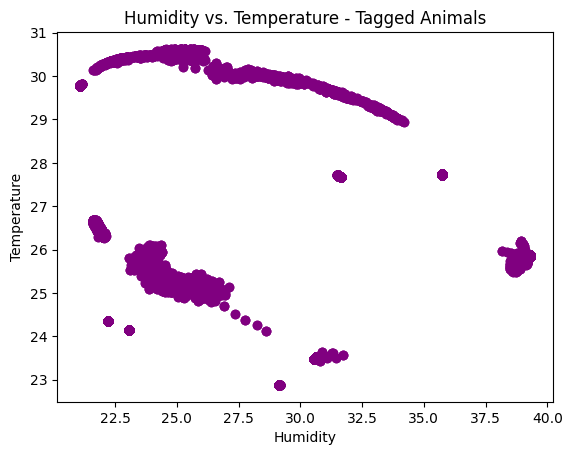

In [23]:
all_temps=[]
all_humids=[]
for data in all_info:
    if("Zebra" in data["name"]):
        if(data["temp"] >0 and data["humidity"] >0):
            all_temps.append(data["temp"])
            all_humids.append(data["humidity"])
       
plt.title("Humidity vs. Temperature - Tagged Animals")
plt.ylabel("Temperature")
plt.xlabel("Humidity")
plt.scatter(all_humids, all_temps, color = 'purple')
plt.show()

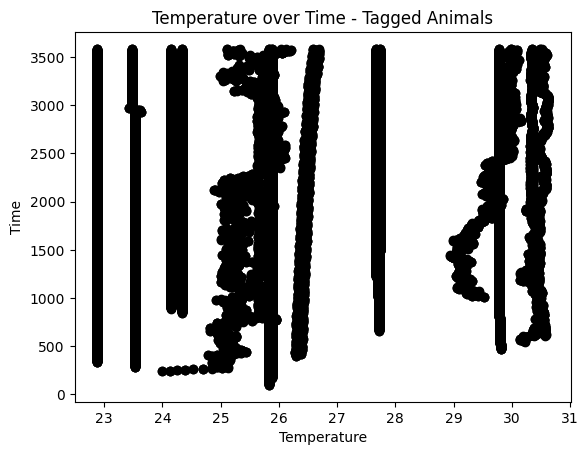

In [24]:
all_temps=[]
all_times=[]
for data in all_info:
    if("Zebra" in data["name"]):
        if(data["temp"] >0 and data["time"] >0):
            all_temps.append(data["temp"])
            all_times.append(data["time"])
       
plt.title("Temperature over Time - Tagged Animals")
plt.ylabel("Time")
plt.xlabel("Temperature")
plt.scatter(all_temps, all_times, color = 'black')
plt.show()

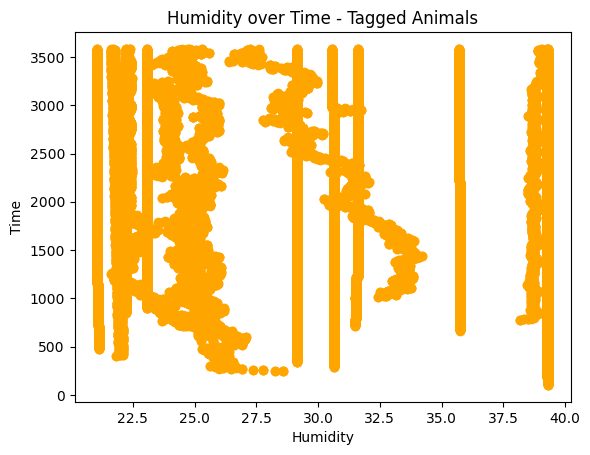

In [25]:
all_humids=[]
all_times=[]
for data in all_info:
    if("Zebra" in data["name"]):
        if(data["humidity"] >0 and data["time"] >0):
            all_humids.append(data["humidity"])
            all_times.append(data["time"])
       
plt.title("Humidity over Time - Tagged Animals")
plt.ylabel("Time")
plt.xlabel("Humidity")
plt.scatter(all_humids, all_times, color = 'orange')
plt.show()